In [1]:
# Imports to be used throughout notebook
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Data Loader
## Implementation

In [2]:
from data_loader import DataLoader

In [3]:
# Create the data loader with the training set file directory
DL = DataLoader("trainingset/")
DL.load_data()
print("Dataset classes: " + str(DL.class_names))

Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Found 2000 files belonging to 2 classes.
Using 200 files for validation.
Dataset classes: ['masked', 'unmasked']


## Testing

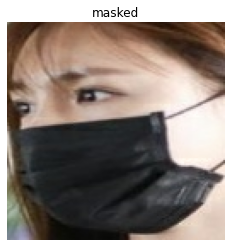

In [4]:
DL.show_class_image("masked")

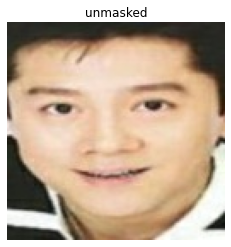

In [5]:
DL.show_class_image("unmasked")

&nbsp;

# Face Mask Classification CNN
## Implementation

In [6]:
from mask_classifier_model import MaskClassifier

In [7]:
# Create CNN model for mask classification
mask_classifier = MaskClassifier(data_loader = DL)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [11]:
# Training the model
epochs = 10
history = mask_classifier.train(10)

Epoch 1/10
60/60 [==============================] - 12s 194ms/step - loss: 0.7166 - accuracy: 0.6102 - val_loss: 0.1638 - val_accuracy: 0.9550
Epoch 2/10
60/60 [==============================] - 9s 150ms/step - loss: 0.1925 - accuracy: 0.9293 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 3/10
60/60 [==============================] - 10s 171ms/step - loss: 0.0977 - accuracy: 0.9672 - val_loss: 0.0423 - val_accuracy: 0.9900
Epoch 4/10
60/60 [==============================] - 10s 171ms/step - loss: 0.0615 - accuracy: 0.9803 - val_loss: 0.0972 - val_accuracy: 0.9650
Epoch 5/10
60/60 [==============================] - 10s 171ms/step - loss: 0.0634 - accuracy: 0.9782 - val_loss: 0.0429 - val_accuracy: 0.9850
Epoch 6/10
60/60 [==============================] - 10s 171ms/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0593 - val_accuracy: 0.9850
Epoch 7/10
60/60 [==============================] - 10s 171ms/step - loss: 0.0284 - accuracy: 0.9892 - val_loss: 0.0536 - val_accuracy: 0.9850


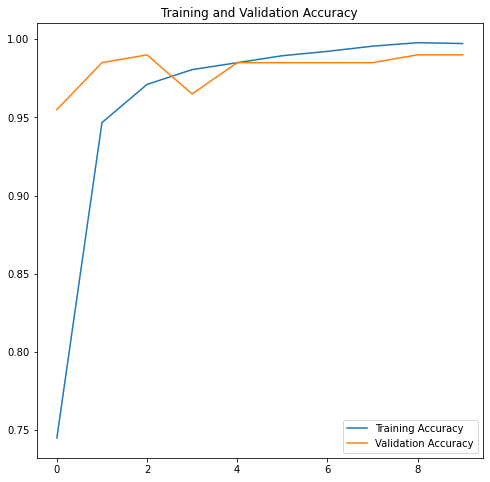

In [15]:
# Access specific results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(epochs)

# Visualize trainin results
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

## Testing

In [8]:
mask_classifier = MaskClassifier(data_loader=DL, model="models/first-model")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

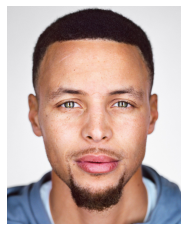

The person is unmasked with a 99.99 percent confidence.


In [9]:
# Read unmasked image from file location
unmasked = DataLoader.read_image("examples/unmasked.jpg")

# Show image
plt.imshow(unmasked)
plt.axis("off")
plt.show()

# Classify image with model
mask_classifier.classify(unmasked)

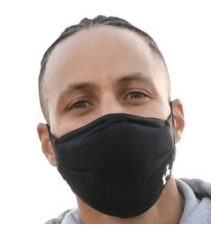

The person is masked with a 100.00 percent confidence.


In [10]:
# Read masked image from file location
masked = DataLoader.read_image("examples/masked.jpg")

# Show image
plt.imshow(masked)
plt.axis("off")
plt.show()

# Classify image with model
mask_classifier.classify(masked)
#print(mask_classifier.predict(masked))

&nbsp;

# Face Detection
## Implementation

#### Most of the implementation of the face detector was done within the file itself and was pre-trained.

In [11]:
from face_detector import FaceDetector

## Testing

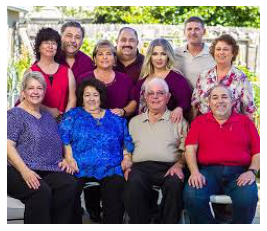

In [12]:
# Read image from file location
faces_img = DataLoader.read_image("examples/faces.jpg")

# Show image
plt.imshow(faces_img)
plt.axis("off")
plt.show()

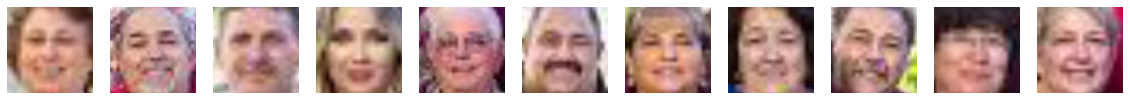

In [13]:
# Detect and crop faces from original image
FaceDetector.show_faces(faces_img)

&nbsp;

# Face Detection - Mask Classification Pipeline
## Implementation

In [14]:
data_loader = DataLoader("trainingset/")
data_loader.load_data()

mask_classifier = MaskClassifier(data_loader, "models/first-model")

Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Found 2000 files belonging to 2 classes.
Using 200 files for validation.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32,

In [17]:
# Detect face images and classify the cropped images. Results are stored in an array of 
# 2-element arrays, where the first element is the numpy array for the cropped face and 
# the second element is the classification of the image.
def detect_and_classify(img):
    image = DataLoader.read_image(img)
    faces = FaceDetector.cropped_faces(image)
    results = []
    for face in faces:
        result = [face, mask_classifier.predict_class(face)]
        results.append(result)
    return results

# Display the results using the data structure of results from detect_and_classify
def display_results(results):
    fig = plt.figure(figsize=(20,20))
    counter = 1
    for result in results:
        ax = fig.add_subplot(len(results), 1, counter)
        ax.title.set_text(result[1])
        ax.axis("off")
        plt.imshow(result[0])
        counter += 1
    plt.show()

## Testing

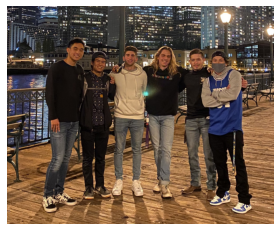

In [18]:
# Sample image to be tested
base = DataLoader.read_image("examples/testimage.jpg")
plt.imshow(base)
plt.axis("off")
plt.show()

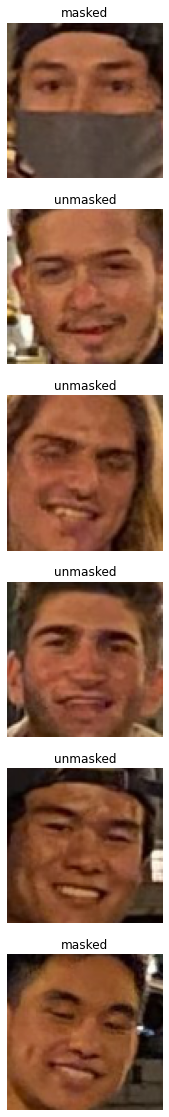

In [21]:
# Display results of running complete model on image
results = detect_and_classify("examples/testimage.jpg")
display_results(results)